<a href="https://colab.research.google.com/github/datatweets/MLBootcamp/blob/main/Diabetes_EDA_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Introduction to the Dataset
- **Context:** Get acquainted with the dataset to understand the types of data it contains and what insights you might uncover.
- **Hint:** Look at the features and consider their real-world applications and implications.

## Data Loading and Cleaning
- **Question 1:** How do you load the dataset and what insights can you gain from previewing the first few rows?
  - **Hint:** This step is critical for initial data assessment.
  - **Code:**

In [2]:
import pandas as pd
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **Question 2:** Examine the dataset for missing values. How would you handle them if they exist?
  - **Hint:** Consider the implications of different methods like removal or imputation.
  - **Code:**
    



In [3]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- **Question 3:** Check the data types of the dataset's columns. Why is this step important?
  - **Hint:** Data types affect how pandas will handle the data.
  - **Code:**
    



In [4]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Exploratory Data Analysis (EDA)
- **Question 4:** Provide a summary of the dataset’s distribution, central tendency, and variability. What do these metrics indicate?
  - **Hint:** Use descriptive statistics to get an initial feel for the data.
  - **Code:**



In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- **Question 5:** Visualize the distribution of each feature. What can you infer from these visualizations?
  - **Hint:** Pay attention to the shape, spread, and any anomalies in the distributions.
  - **Code:**



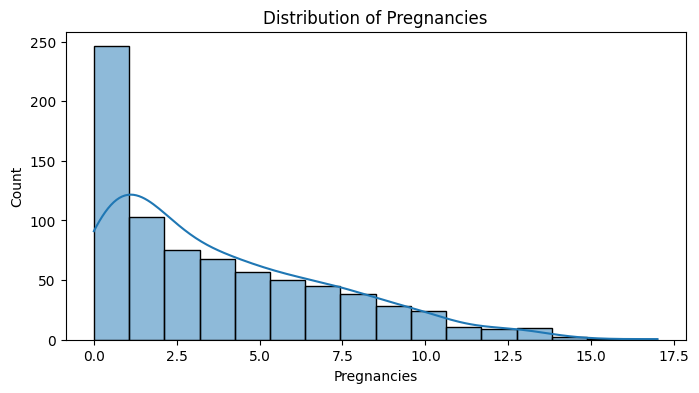

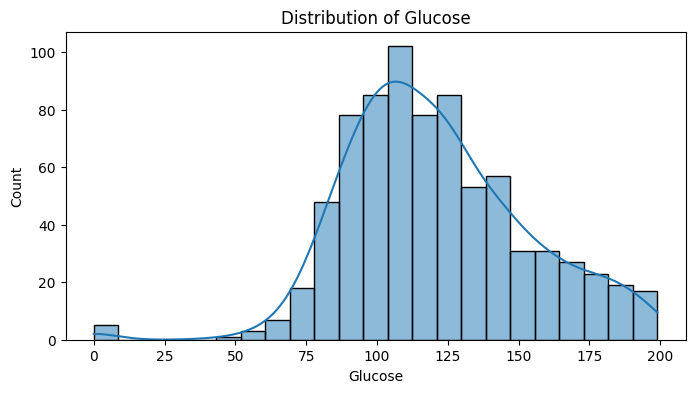

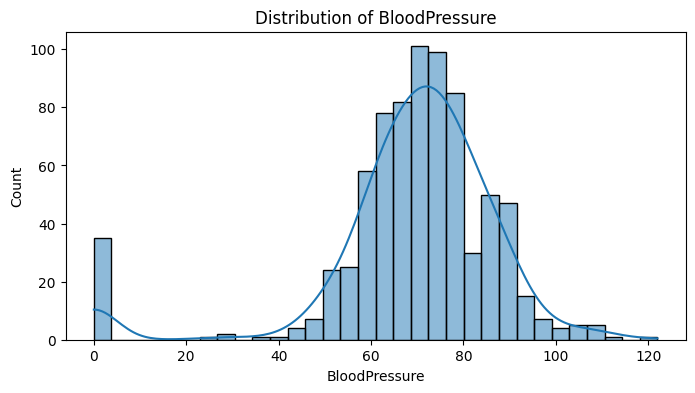

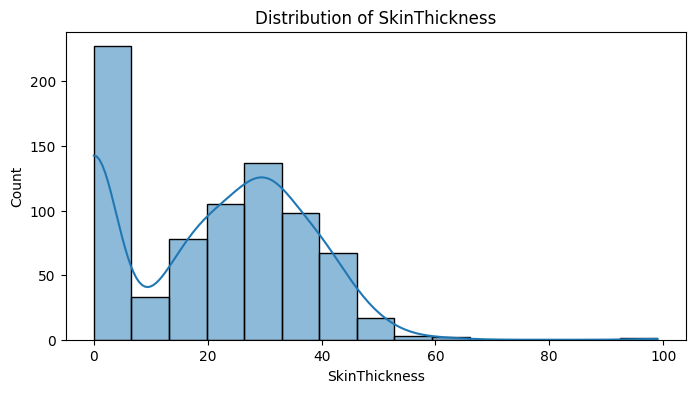

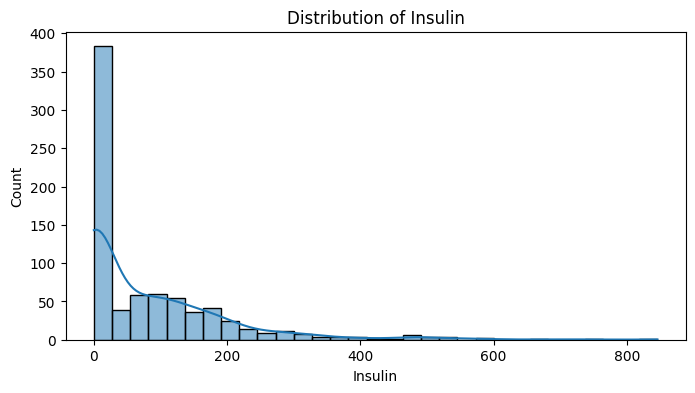

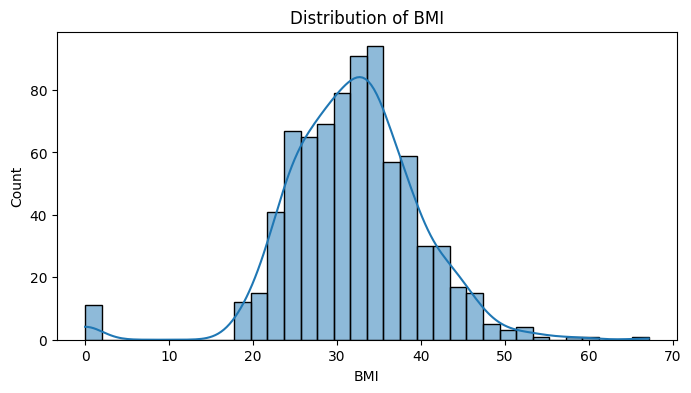

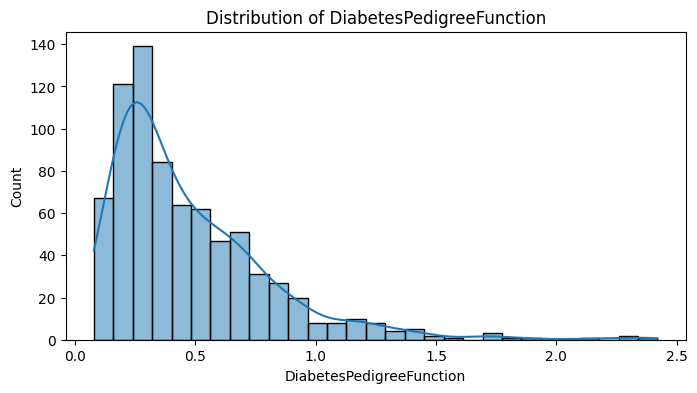

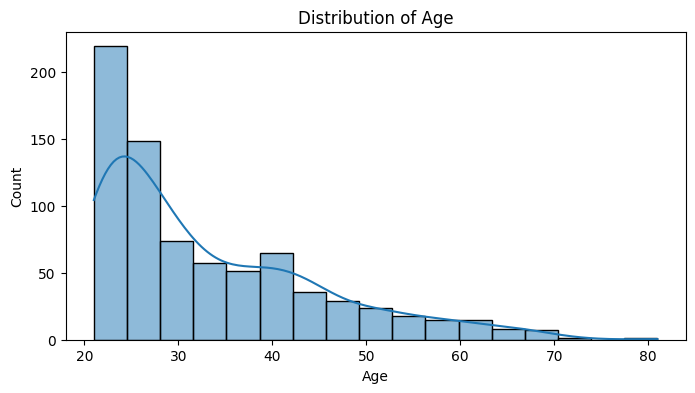

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in diabetes_data.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(diabetes_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Data Visualization
- **Question 6:** How does a correlation heatmap help in understanding the relationships between variables?
  - **Hint:** Look for strong positive or negative correlations.
  - **Code:**



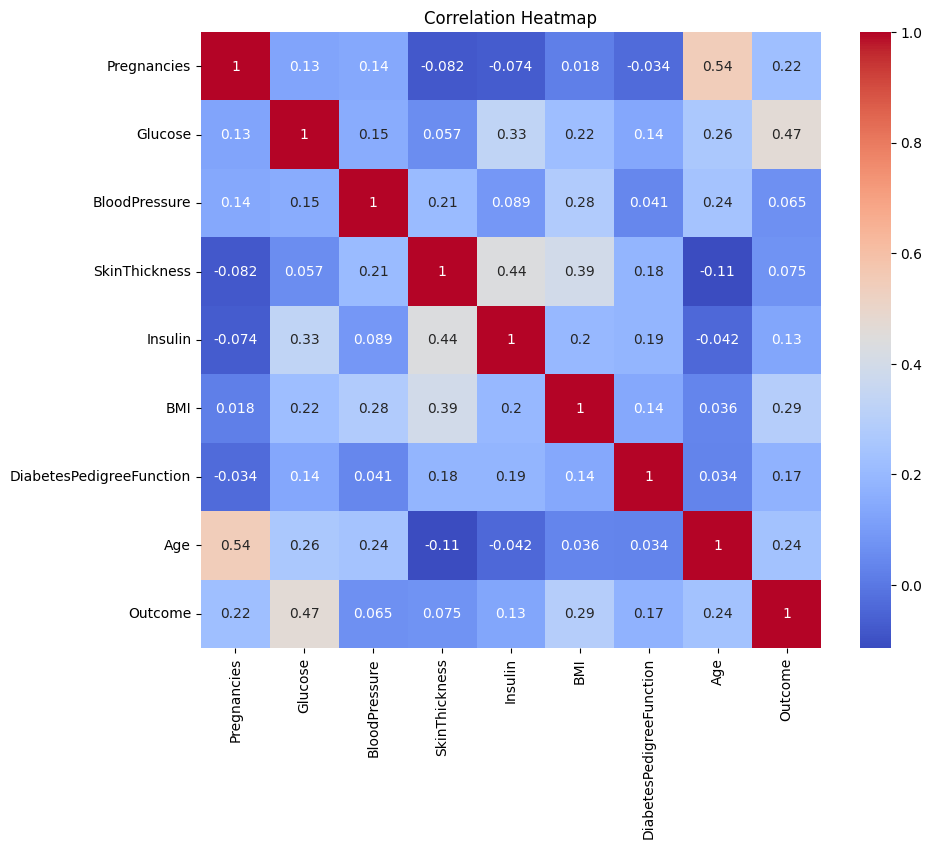

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **Question 7:** What can you learn from creating box plots and scatter plots of the data?
  - **Hint:** These plots are helpful for identifying outliers and visualizing data trends.
  - **Code:**
    

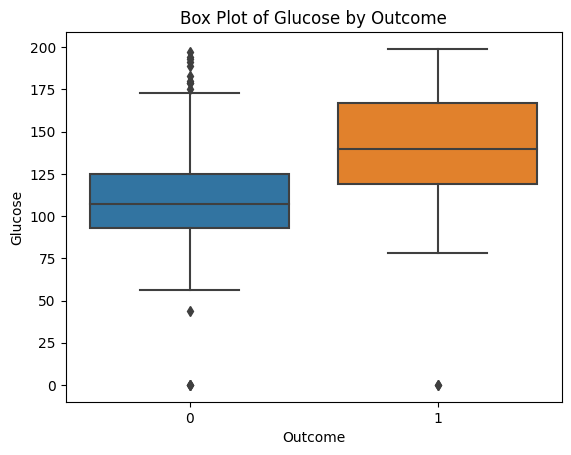

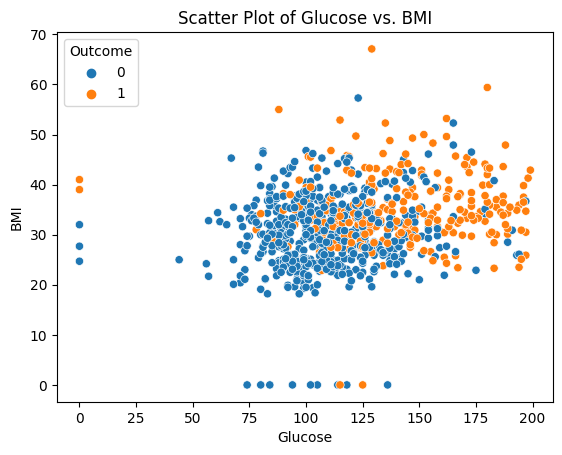

In [9]:
# Box plot for 'Glucose'
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data)
plt.title('Box Plot of Glucose by Outcome')
plt.show()

# Scatter plot between 'Glucose' and 'BMI'
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=diabetes_data)
plt.title('Scatter Plot of Glucose vs. BMI')
plt.show()

## Advanced Data Analysis
- **Question 8:** Calculate the IQR for 'Glucose' and use it to identify outliers. Why is IQR preferred over range in outlier detection?
  - **Hint:** IQR provides a more robust measure by focusing on the middle 50% of the data.
  - **Code:**



In [10]:
Q1 = diabetes_data['Glucose'].quantile(0.25)
Q3 = diabetes_data['Glucose'].quantile(0.75)
IQR = Q3 - Q1
outliers = diabetes_data[(diabetes_data['Glucose'] < (Q1 - 1.5 * IQR)) | (diabetes_data['Glucose'] > (Q3 + 1.5 * IQR))]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


- **Question 9:** Use the `groupby` method to examine the mean values of numerical features for different outcome groups. What insights can this analysis provide?
  - **Hint:** This technique can reveal differences in feature behavior between groups.
  - **Code:**



In [11]:
grouped_means = diabetes_data.groupby('Outcome').mean()
grouped_means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Deep Dive with Pandas
- **Question 10:** How would you use `loc[]` and `iloc[]` to select data where `Age` is greater than 50? What are the differences between these two methods?
  - **Hint:** Understand the distinction between label-based and integer-based indexing.
  - **Code:**

In [14]:
# Using loc[]
data_age_above_50_loc = diabetes_data.loc[diabetes_data['Age'] > 50]

# Using iloc[]
data_age_above_50_iloc = diabetes_data.iloc[(diabetes_data['Age'] > 50).values]
data_age_above_50_iloc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52,1
734,2,105,75,0,0,23.3,0.560,53,0
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1


## Inferences and Conclusions
- **Question 11:** Reflect on the insights gained from the analysis. How might these findings be significant in a healthcare context?
  - **Hint:** Think about the implications of your findings for diabetes risk assessment and management.

## Appendix (Solutions and Comments)
- **Context:** Ensure your analysis is well-documented with clear explanations for each step.